Telco Customer Data : Subscription based


## Title i thought it should have: " Customer Churn Analysis and Retention Strategies ""

## Title it deserves = " The Impact of Service Features and Contract Length on Customer Churn "

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('/Users/saqib/Downloads/WA_Fn-UseC_-Telco-Customer-Churn 2.csv')

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
# Count total and subscribed
gender_analysis = df.groupby("gender")['Churn'].value_counts(normalize=True).unstack()

#rename columns
gender_analysis.columns= ["Not Subscribed", "Subscribed"]
gender_analysis *= 100
print(gender_analysis)

        Not Subscribed  Subscribed
gender                            
Female       73.079128   26.920872
Male         73.839662   26.160338


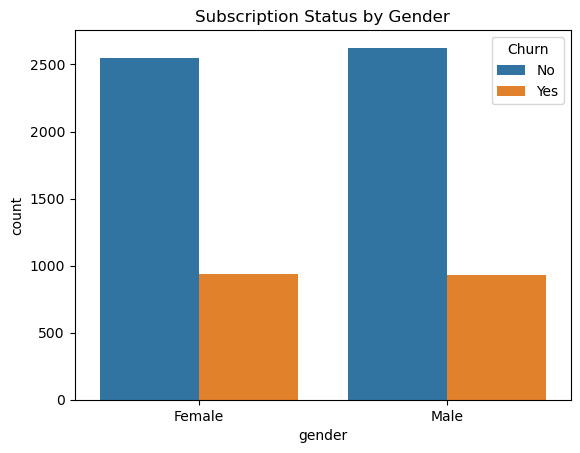

In [11]:
#plot the data

sns.countplot(data=df, x = "gender", hue="Churn")
plt.title("Subscription Status by Gender")
plt.show()

In [13]:
# Determine whether the relationship is statistically significant, Using a Chi-Square Test.
from scipy.stats import chi2_contingency

#table
contingency_table = pd.crosstab(df['gender'], df['Churn'])

#perform chi- test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistics: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between Gender and Subscription.")
else:
    print("No significant relationship between Gender and Subscription.")

Chi2 Statistics: 0.4840828822091383
P-value: 0.48657873605618596
No significant relationship between Gender and Subscription.


Upon analyzing the churn data, I discovered that 74% of our female customers have unsubscribed, while 26% have churned. This indicates a significant customer retention issue that needs to be addressed.

To tackle this business problem, I began by cleaning the dataset, ensuring that there were no data type inconsistencies or missing values. Following this, I investigated whether there was a statistically significant relationship between gender and churn using the chi-square test. However, the analysis revealed no significant relationship between gender and churn, indicating that churn behavior is not gender-dependent.

Next, I explored the relationship between gender, online security, and churn. The findings showed that:

-   20% of women who did not opt for online security had churned.

-   28% of women without online security had not churned.

-   21% of men without online security had churned.

-   30% of men without online security had not churned.

These insights suggest that a lack of online security may be influencing churn behavior, and offering online security as a service could be an effective retention strategy, particularly among female customers.

Given these findings, I recommend further analysis into the impact of online security and other service features on churn, with a focus on targeted retention strategies for female customers and those without online security.



## Relationship between  gender, online security subscription and churn

In [16]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [18]:
# Group by Gender, Online Security, and Subscribed
gender_onelineSecurity_analysis = df.groupby(["gender", "OnlineSecurity", "Churn"]).size().reset_index(name='Count')

print(gender_onelineSecurity_analysis)

    gender       OnlineSecurity Churn  Count
0   Female                   No    No    993
1   Female                   No   Yes    721
2   Female  No internet service    No    691
3   Female  No internet service   Yes     56
4   Female                  Yes    No    865
5   Female                  Yes   Yes    162
6     Male                   No    No   1044
7     Male                   No   Yes    740
8     Male  No internet service    No    722
9     Male  No internet service   Yes     57
10    Male                  Yes    No    859
11    Male                  Yes   Yes    133


In [20]:
gender_onelineSecurity_analysis_percent = df.groupby(["gender", "OnlineSecurity", "Churn"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name="percentage")
print(gender_onelineSecurity_analysis_percent)

    gender       OnlineSecurity Churn  percentage
0   Female                   No    No   28.469037
1   Female                   No   Yes   20.670872
2   Female  No internet service    No   19.810780
3   Female  No internet service   Yes    1.605505
4   Female                  Yes    No   24.799312
5   Female                  Yes   Yes    4.644495
6     Male                   No    No   29.367089
7     Male                   No   Yes   20.815752
8     Male  No internet service    No   20.309423
9     Male  No internet service   Yes    1.603376
10    Male                  Yes    No   24.163150
11    Male                  Yes   Yes    3.741210


/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_1452/687907869.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  gender_onelineSecurity_analysis_percent = df.groupby(["gender", "OnlineSecurity", "Churn"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name="percentage")


In [22]:
# pivot
pivot = pd.pivot_table(df,
                      index=["gender", "OnlineSecurity"],
                      columns="Churn",
                      aggfunc='size',
                      fill_value=0)
print(pivot)

Churn                         No  Yes
gender OnlineSecurity                
Female No                    993  721
       No internet service   691   56
       Yes                   865  162
Male   No                   1044  740
       No internet service   722   57
       Yes                   859  133


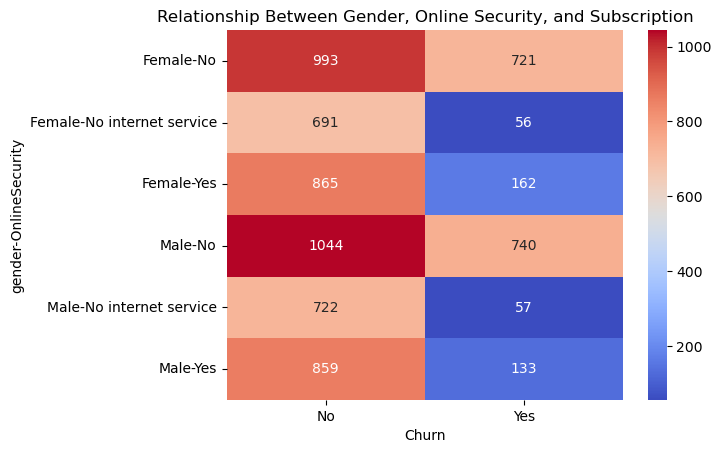

In [24]:
#heatmap data
heatmap_data = pivot
# heatmap plot 
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship Between Gender, Online Security, and Subscription')
plt.show()

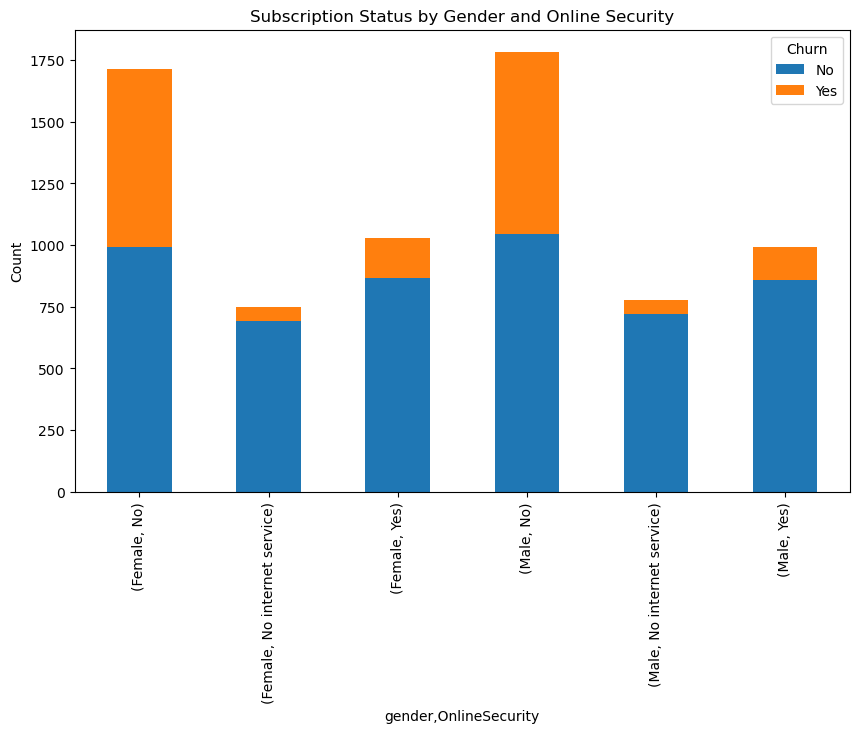

In [26]:
# grouping data
plot_data = df.groupby(["gender","OnlineSecurity", "Churn"]).size().unstack()

#plot stacked bar plot
plot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Subscription Status by Gender and Online Security')
plt.ylabel('Count')
plt.show()

In [28]:
# statistical analysis

contingency_table = pd.crosstab([df['gender'], df['OnlineSecurity']], df['Churn'])

# perform chi test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistics: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("There is a significant relationship between Gender, Online Security, and Subscription.")
else:
    print("No significant relationship between these variables.")

Chi2 Statistics: 851.6089902160829
P-Value: 7.891609296321905e-182
There is a significant relationship between Gender, Online Security, and Subscription.


Gender and Online Security influence Churn:

-   The significant result suggests that the combination of a person's gender and whether they have opted for Online Security influences their likelihood of Churn (Yes or No).

Online Security likely reduces churn:

-   Observing the raw data:

-   Customers with Online Security = Yes have lower churn rates (e.g., Female: 865 No Churn vs. 162 Churn; Male: 859 No Churn vs. 133 Churn).

-   Customers with Online Security = No have relatively higher churn rates (e.g., Female: 993 No Churn vs. 721 Churn; Male: 1044 No Churn vs. 740 Churn).

-   This indicates that opting for Online Security might make customers less likely to churn.

No Internet Service Customers:

-   Both genders with "No Internet Service" have very low churn rates (e.g., Female: 691 No Churn vs. 56 Churn; Male: 722 No Churn vs. 57 Churn).

-   This may suggest that "No Internet Service" customers are not heavily engaged or are less likely to churn for other reasons.

Gender-Specific Behavior:

-   The distribution of churn between male and female customers is different.

-   Female churn is slightly lower in some cases (e.g., Female Online Security: Yes, 162 churn; Male Online Security: Yes, 133 churn).

### Business Recommendations:

1.  Promote Online Security Services:

-   Customers with Online Security churn less. Encourage customers, especially those without it, to opt for these services.

3.  Focus on Male Customers Without Security:

-   Males without Online Security have relatively high churn rates. Target them with retention campaigns or offers for Online Security.

5.  Retain Low-Risk Customers:

-   Ensure "No Internet Service" customers remain satisfied, even though their churn rates are low.

### Relationship between three categorical variables, like Gender, Device Protection (Yes/No), and Subscribed (Yes/No)

In [31]:
grouped = df.groupby(["gender", "DeviceProtection", "Churn"]).size().reset_index(name='Count')

print(grouped)

    gender     DeviceProtection Churn  Count
0   Female                   No    No    922
1   Female                   No   Yes    616
2   Female  No internet service    No    691
3   Female  No internet service   Yes     56
4   Female                  Yes    No    936
5   Female                  Yes   Yes    267
6     Male                   No    No    962
7     Male                   No   Yes    595
8     Male  No internet service    No    722
9     Male  No internet service   Yes     57
10    Male                  Yes    No    941
11    Male                  Yes   Yes    278


In [33]:
# normalise the data to get percentage
grouped_percentage = df.groupby(["gender", "DeviceProtection", "Churn"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='Percentage')
print(grouped_percentage)

    gender     DeviceProtection Churn  Percentage
0   Female                   No    No   26.433486
1   Female                   No   Yes   17.660550
2   Female  No internet service    No   19.810780
3   Female  No internet service   Yes    1.605505
4   Female                  Yes    No   26.834862
5   Female                  Yes   Yes    7.654817
6     Male                   No    No   27.060478
7     Male                   No   Yes   16.736990
8     Male  No internet service    No   20.309423
9     Male  No internet service   Yes    1.603376
10    Male                  Yes    No   26.469761
11    Male                  Yes   Yes    7.819972


/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_1452/2378332618.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_percentage = df.groupby(["gender", "DeviceProtection", "Churn"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='Percentage')


In [35]:
# pivoting for insights 
pivot = pd.pivot_table(df,
                      index=["gender", "DeviceProtection"],
                      columns='Churn',
                      aggfunc='size',
                      fill_value=0)
print(pivot)

Churn                        No  Yes
gender DeviceProtection             
Female No                   922  616
       No internet service  691   56
       Yes                  936  267
Male   No                   962  595
       No internet service  722   57
       Yes                  941  278


In [37]:
df["DeviceProtection"].unique() # just checking my column values

array(['No', 'Yes', 'No internet service'], dtype=object)

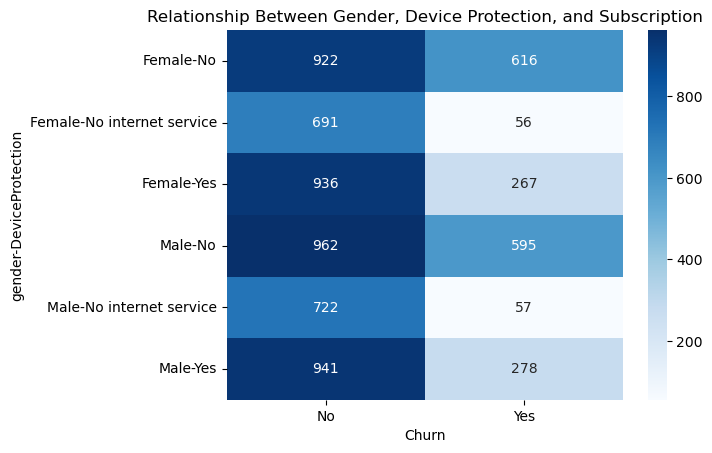

In [39]:
heatmap_data = pivot
# plotting
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d')
plt.title('Relationship Between Gender, Device Protection, and Subscription')
plt.show()

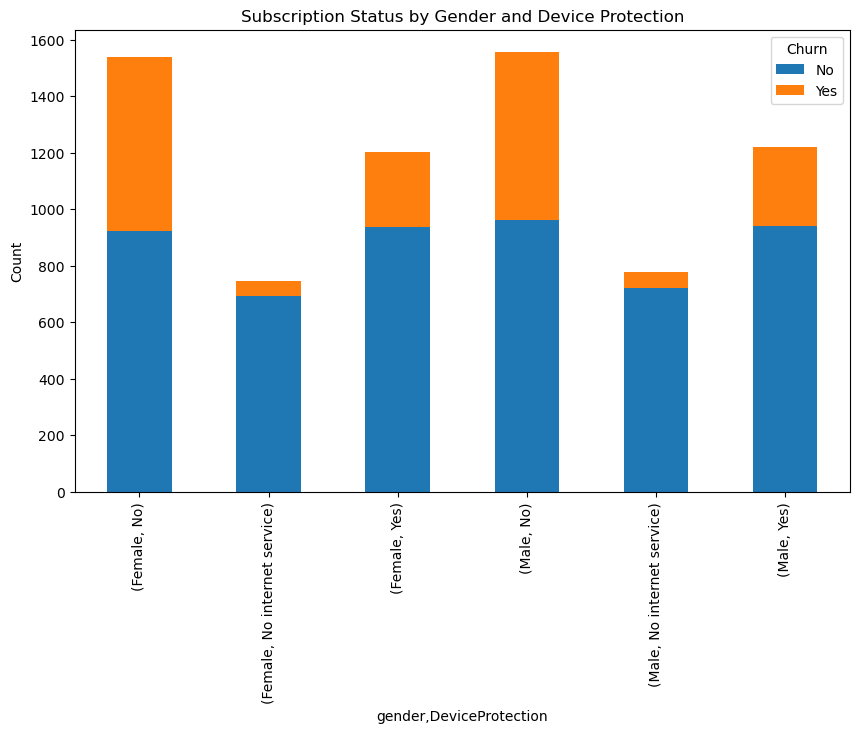

In [41]:
# stacked bar plot 
# grouping data
plot_data = df.groupby(["gender", "DeviceProtection", "Churn"]).size().unstack()

# plot
plot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Subscription Status by Gender and Device Protection')
plt.ylabel('Count')
plt.show()

In [43]:
# stat analysis
contingency_table = pd.crosstab([df['gender'], df['DeviceProtection']], df["Churn"])

# perform chi test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between Gender, Device Protection, and Subscription.")
else:
    print("No significant relationship between these variables.")

Chi2 Statistic: 559.8816919097478
P-value: 9.386928987520602e-119
There is a significant relationship between Gender, Device Protection, and Subscription.


Relationship between three categorical variables, like Gender, Device Protection (Yes/No), and Subscribed (Yes/No)

### Insights:

#### 1\. Device Protection Reduces Churn:

-   Customers who have opted for Device Protection = Yes have lower churn rates across both genders:

-   Female: 26.83% (No Churn) vs. 7.65% (Churn).

-   Male: 26.47% (No Churn) vs. 7.82% (Churn).

-   This indicates that customers with Device Protection are less likely to churn, likely due to the perceived value of this service.

#### 2\. Customers Without Device Protection are More Likely to Churn:

-   Customers with Device Protection = No have higher churn rates:

-   Female: 26.43% (No Churn) vs. 17.66% (Churn).

-   Male: 27.06% (No Churn) vs. 16.73% (Churn).

-   This shows that customers without Device Protection are at a greater risk of leaving.

#### 3\. No Internet Service Customers Show Low Churn:

-   Customers with No Internet Service exhibit very low churn rates:

-   Female: 19.81% (No Churn) vs. 1.60% (Churn).

-   Male: 20.31% (No Churn) vs. 1.60% (Churn).

-   These customers might already be disengaged, and churn is less relevant for them.

#### 4\. Gender Differences are Minimal:

-   The percentage distributions are similar across genders:

-   Females and males have comparable churn behaviors in each Device Protection category.

### Recommendations:

1.  Encourage Device Protection Subscription:

-   Customers with Device Protection are less likely to churn. Launch marketing campaigns emphasizing the benefits of Device Protection, especially targeting customers who haven't opted for it.

3.  Retention Focus on "No Protection" Users:

-   Focus on retaining customers who do not have Device Protection. Offer promotions, discounts, or bundled packages to incentivize adoption.

5.  Monitor "No Internet Service" Customers:

-   Although churn is low in this segment, engagement might also be low. Ensure these customers remain satisfied to prevent future churn risks.

7.  Segmented Retention Strategies by Gender:

-   While gender differences are minimal, targeted messaging for males and females (e.g., ads tailored to preferences) could still improve engagement.

### Relationship between three categorical variables, like Gender, TechSupport (Yes/No), and Subscribed (Yes/No)

In [46]:
grouped = df.groupby(["gender", "TechSupport", "Churn"]).size().reset_index(name='Count')

print(grouped)

    gender          TechSupport Churn  Count
0   Female                   No    No    996
1   Female                   No   Yes    718
2   Female  No internet service    No    691
3   Female  No internet service   Yes     56
4   Female                  Yes    No    862
5   Female                  Yes   Yes    165
6     Male                   No    No   1031
7     Male                   No   Yes    728
8     Male  No internet service    No    722
9     Male  No internet service   Yes     57
10    Male                  Yes    No    872
11    Male                  Yes   Yes    145


In [48]:
grouped_percentage = df.groupby(["gender", "TechSupport", "Churn"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='Percentage')
print(grouped_percentage)

    gender          TechSupport Churn  Percentage
0   Female                   No    No   28.555046
1   Female                   No   Yes   20.584862
2   Female  No internet service    No   19.810780
3   Female  No internet service   Yes    1.605505
4   Female                  Yes    No   24.713303
5   Female                  Yes   Yes    4.730505
6     Male                   No    No   29.001406
7     Male                   No   Yes   20.478200
8     Male  No internet service    No   20.309423
9     Male  No internet service   Yes    1.603376
10    Male                  Yes    No   24.528833
11    Male                  Yes   Yes    4.078762


/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_1452/4004558237.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_percentage = df.groupby(["gender", "TechSupport", "Churn"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='Percentage')


In [50]:
# pivoting for insights 
pivot = pd.pivot_table(df,
                      index=["gender", "TechSupport"],
                      columns='Churn',
                      aggfunc='size',
                      fill_value=0)
print(pivot)

Churn                         No  Yes
gender TechSupport                   
Female No                    996  718
       No internet service   691   56
       Yes                   862  165
Male   No                   1031  728
       No internet service   722   57
       Yes                   872  145


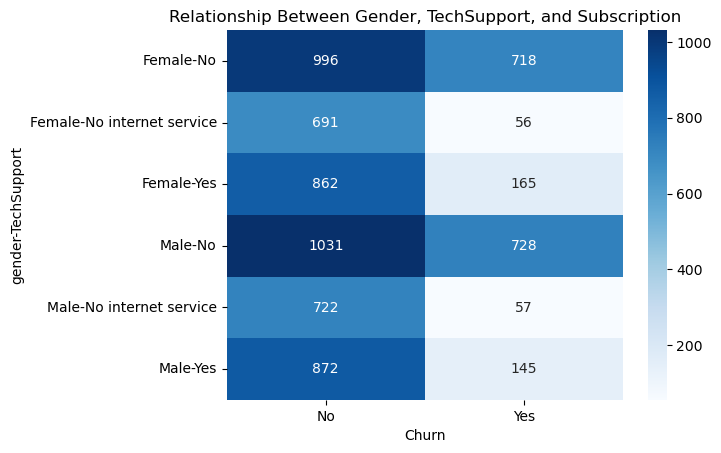

In [52]:
heatmap_data = pivot
# plotting
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d')
plt.title('Relationship Between Gender, TechSupport, and Subscription')
plt.show()

In [54]:
# stat analysis
contingency_table = pd.crosstab([df['gender'], df['TechSupport']], df["Churn"])

# perform chi test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between Gender, TechSupport, and Subscription.")
else:
    print("No significant relationship between these variables.")

Chi2 Statistic: 829.1734902407562
P-value: 5.6444495774360696e-177
There is a significant relationship between Gender, TechSupport, and Subscription.


In [57]:
grouped = df.groupby(["gender", "StreamingTV", "Churn"]).size().reset_index(name='Count')

print(grouped)

    gender          StreamingTV Churn  Count
0   Female                   No    No    905
1   Female                   No   Yes    481
2   Female  No internet service    No    691
3   Female  No internet service   Yes     56
4   Female                  Yes    No    953
5   Female                  Yes   Yes    402
6     Male                   No    No    963
7     Male                   No   Yes    461
8     Male  No internet service    No    722
9     Male  No internet service   Yes     57
10    Male                  Yes    No    940
11    Male                  Yes   Yes    412


In [59]:
# stat analysis
contingency_table = pd.crosstab([df['gender'], df['StreamingTV']], df["Churn"])

# perform chi test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between Gender, StreamingTV, and Subscription.")
else:
    print("No significant relationship between these variables.")

Chi2 Statistic: 376.3924166555959
P-value: 3.623783080343316e-79
There is a significant relationship between Gender, StreamingTV, and Subscription.


Relationship between three categorical variables, like Gender, TechSupport (Yes/No), and Subscribed (Yes/No)


Insights:
1. Tech Support Reduces Churn:
Customers who have opted for Tech Support = Yes have lower churn rates:
Female: 24.71% (No Churn) vs. 4.73% (Churn).
Male: 24.52% (No Churn) vs. 4.08% (Churn).
This indicates that customers with active Tech Support are significantly less likely to churn, possibly due to improved service satisfaction or perceived value.
2. Customers Without Tech Support are More Likely to Churn:
Customers with Tech Support = No have higher churn rates:
Female: 28.56% (No Churn) vs. 20.58% (Churn).
Male: 29.00% (No Churn) vs. 20.48% (Churn).
This highlights the importance of Tech Support in reducing churn rates, as customers without it show higher churn tendencies.
3. No Internet Service Customers Exhibit Minimal Churn:
Customers with No Internet Service show low churn rates:
Female: 19.81% (No Churn) vs. 1.61% (Churn).
Male: 20.31% (No Churn) vs. 1.60% (Churn).
These customers may already have minimal engagement with the company, leading to lower churn.
4. Gender Differences are Minimal:
Both genders exhibit similar churn behaviors within each Tech Support category:
For instance, the difference in churn rates between males and females for Tech Support = Yes is marginal (4.73% vs. 4.08%).
Recommendations:
1. Encourage Tech Support Subscriptions:
Since customers with Tech Support are less likely to churn, focus on promoting this service to customers without it through:
Discounts or trial periods.
Bundled packages with other services.
Marketing campaigns emphasizing the benefits of Tech Support.
2. Target High-Risk Groups:
Customers without Tech Support exhibit higher churn rates. Implement targeted retention strategies, such as personalized offers or loyalty rewards, to reduce churn in this group.
3. Engage "No Internet Service" Customers:
Although churn is low in this segment, these customers might have limited engagement with the company. Introduce tailored offerings or incentives to maintain their loyalty.
4. Gender-Neutral Strategies:
Gender differences are minimal, suggesting that similar strategies can be applied across both male and female customer groups.


### Relationship between three categorical variables, like Gender, contract type (Month-to-month / One year / Two year), and Subscribed (Yes/No)

In [62]:
grouped = df.groupby(["gender", "Contract", "Churn"]).size().reset_index(name='Count')

print(grouped)

    gender        Contract Churn  Count
0   Female  Month-to-month    No   1083
1   Female  Month-to-month   Yes    842
2   Female        One year    No    643
3   Female        One year   Yes     75
4   Female        Two year    No    823
5   Female        Two year   Yes     22
6     Male  Month-to-month    No   1137
7     Male  Month-to-month   Yes    813
8     Male        One year    No    664
9     Male        One year   Yes     91
10    Male        Two year    No    824
11    Male        Two year   Yes     26


In [64]:
# normalise the data to get percentage
grouped_percentage = df.groupby(["gender", "Contract", "Churn"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='Percentage')
print(grouped_percentage)

    gender        Contract Churn  Percentage
0   Female  Month-to-month    No   31.049312
1   Female  Month-to-month   Yes   24.139908
2   Female        One year    No   18.434633
3   Female        One year   Yes    2.150229
4   Female        Two year    No   23.595183
5   Female        Two year   Yes    0.630734
6     Male  Month-to-month    No   31.983122
7     Male  Month-to-month   Yes   22.869198
8     Male        One year    No   18.677918
9     Male        One year   Yes    2.559775
10    Male        Two year    No   23.178622
11    Male        Two year   Yes    0.731364


/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_1452/3794666357.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_percentage = df.groupby(["gender", "Contract", "Churn"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='Percentage')


In [66]:
# pivoting for insights 
pivot = pd.pivot_table(df,
                      index=["gender", "Contract"],
                      columns='Churn',
                      aggfunc='size',
                      fill_value=0)
print(pivot)

Churn                    No  Yes
gender Contract                 
Female Month-to-month  1083  842
       One year         643   75
       Two year         823   22
Male   Month-to-month  1137  813
       One year         664   91
       Two year         824   26


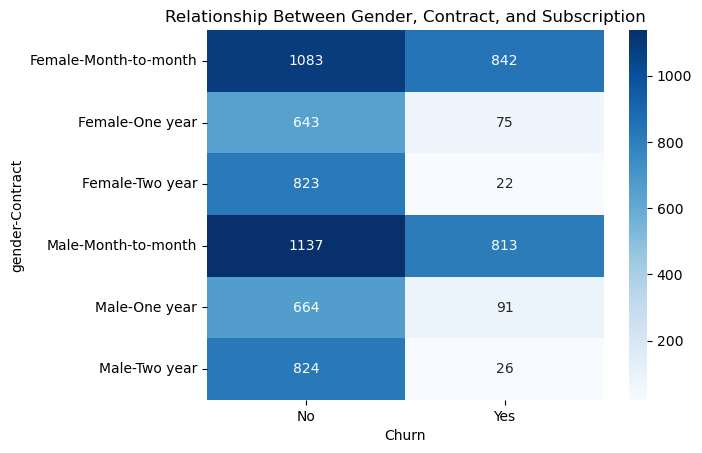

In [68]:
heatmap_data = pivot
# plotting
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d')
plt.title('Relationship Between Gender, Contract, and Subscription')
plt.show()

In [70]:
# stat analysis
contingency_table = pd.crosstab([df['gender'], df['Contract']], df["Churn"])

# perform chi test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between Gender, Contract, and Subscription.")
else:
    print("No significant relationship between these variables.")

Chi2 Statistic: 1187.2133851056328
P-value: 1.7282157299952124e-254
There is a significant relationship between Gender, Contract, and Subscription.


Relationship between three categorical variables, like Gender, contract type (Month-to-month / One year / Two year), and Subscribed (Yes/No)

### Insights:

#### 1\. Month-to-Month Contracts Have the Highest Churn:

-   Customers with Month-to-Month contracts exhibit the highest churn rates:

-   Female: 24.14% churn.

-   Male: 22.87% churn.

-   This suggests that Month-to-Month contracts are associated with higher flexibility, leading to easier cancellations and higher churn rates.

#### 2\. Longer Contracts Have Lower Churn:

-   Customers with One-Year or Two-Year contracts show significantly lower churn rates:

-   One Year:

-   Female: 2.15% churn.

-   Male: 2.56% churn.

-   Two Year:

-   Female: 0.63% churn.

-   Male: 0.73% churn.

-   Longer-term contracts provide stability and higher commitment, resulting in reduced churn.

#### 3\. Month-to-Month Contracts Dominate Active Customers:

-   The largest proportion of customers who did not churn are on Month-to-Month contracts:

-   Female: 31.05% (No Churn).

-   Male: 31.98% (No Churn).

-   This could indicate that while Month-to-Month contracts contribute to churn, they are also widely popular among active customers.

#### 4\. Gender Differences Are Minimal:

-   Across all contract types, the differences between male and female churn rates are negligible:

-   Month-to-Month: 24.14% (Female) vs. 22.87% (Male).

-   One Year: 2.15% (Female) vs. 2.56% (Male).

-   Two Year: 0.63% (Female) vs. 0.73% (Male).

-   This suggests that churn behavior is influenced more by the contract type than by gender.

### Recommendations:

#### 1\. Focus on Retaining Month-to-Month Customers:

-   Since these customers are more likely to churn, retention strategies should target this group:

-   Offer incentives for longer-term commitments (e.g., discounts for switching to annual plans).

-   Highlight benefits of longer-term contracts, such as cost savings or additional services.

-   Implement loyalty rewards or personalized offers to encourage Month-to-Month customers to stay.

#### 2\. Promote Long-Term Contracts:

-   Long-term contracts have the lowest churn rates. Encourage customers to choose these plans:

-   Offer exclusive discounts or benefits for One-Year and Two-Year contracts.

-   Provide detailed cost comparisons to show savings with longer-term contracts.

#### 3\. Monitor and Improve Month-to-Month Experience:

-   Since Month-to-Month contracts are popular among active customers, improving their experience can reduce churn:

-   Regularly engage with these customers to assess satisfaction.

-   Provide flexible add-ons or services to enhance their value perception.

#### 4\. Implement Gender-Neutral Strategies:

-   As gender differences in churn behavior are minimal, focus on contract-specific strategies rather than gender-based ones.

In [72]:
# contract type vs subscription

# Count contract and subscribed
gender_analysis = df.groupby("Contract")['Churn'].value_counts(normalize=True).unstack()

#rename columns
gender_analysis.columns= ["Not Subscribed", "Subscribed"]
gender_analysis *= 100
print(gender_analysis)

                Not Subscribed  Subscribed
Contract                                  
Month-to-month       57.290323   42.709677
One year             88.730482   11.269518
Two year             97.168142    2.831858


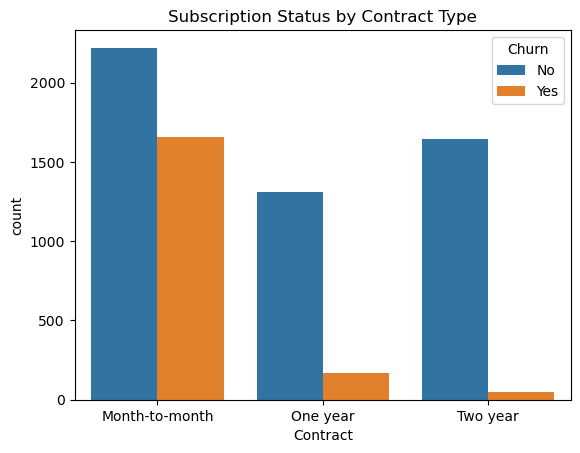

In [74]:
#plot the data

sns.countplot(data=df, x = "Contract", hue="Churn")
plt.title("Subscription Status by Contract Type")
plt.show()

In [76]:
# Determine whether the relationship is statistically significant, Using a Chi-Square Test.
from scipy.stats import chi2_contingency

#table
contingency_table = pd.crosstab(df['Contract'], df['Churn'])

#perform chi- test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistics: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between Contract Type and Subscription.")
else:
    print("No significant relationship between Gender and Subscription.")

Chi2 Statistics: 1184.5965720837926
P-value: 5.863038300673391e-258
There is a significant relationship between Contract Type and Subscription.


### relationship between Gender, SeniorCitizen (1 for Yes, 0 for No), and Subscribed (Yes/No)

In [79]:
grouped = df.groupby(["gender", "SeniorCitizen", "Churn"]).size().reset_index(name='Count')

print(grouped)

   gender  SeniorCitizen Churn  Count
0  Female              0    No   2221
1  Female              0   Yes    699
2  Female              1    No    328
3  Female              1   Yes    240
4    Male              0    No   2287
5    Male              0   Yes    694
6    Male              1    No    338
7    Male              1   Yes    236


In [81]:
# normalise count to percentage
grouped_percentage = df.groupby(["gender", "SeniorCitizen", "Churn"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name="Percentage")
grouped_percentage

/var/folders/2c/hpk9j8md6h71406dzkc5_w1m0000gn/T/ipykernel_1452/2925283006.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_percentage = df.groupby(["gender", "SeniorCitizen", "Churn"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name="Percentage")


,gender,SeniorCitizen,Churn,Percentage
0,Female,0,No,63.675459
1,Female,0,Yes,20.040138
2,Female,1,No,9.403670
3,Female,1,Yes,6.880734
4,Male,0,No,64.331927
5,Male,0,Yes,19.521800
6,Male,1,No,9.507736
7,Male,1,Yes,6.638537


In [83]:
pivot = df.pivot_table(df,
                      index=["gender", "SeniorCitizen"],
                      columns= "Churn",
                      aggfunc='size',
                      fill_value=0)
print(pivot)

Churn                   No  Yes
gender SeniorCitizen           
Female 0              2221  699
       1               328  240
Male   0              2287  694
       1               338  236


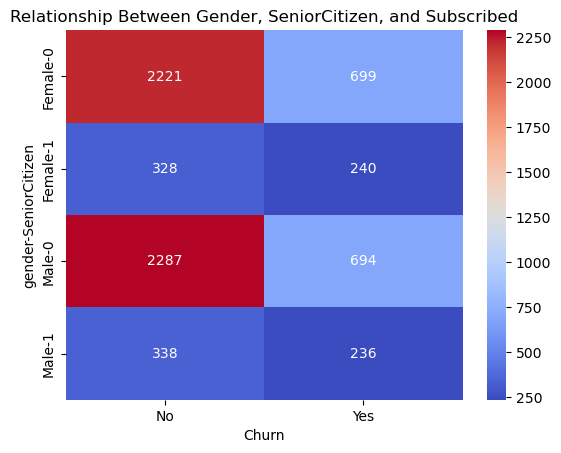

In [85]:
# heatmap
heatmap_data = pivot
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship Between Gender, SeniorCitizen, and Subscribed')
plt.show()

In [87]:
# Create a contingency table
contingency_table = pd.crosstab([df['gender'], df['SeniorCitizen']], df['Churn'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between Gender, SeniorCitizen, and Subscribed.")
else:
    print("No significant relationship between these variables.")

Chi2 Statistic: 160.86914869550947
P-value: 1.1900346099307884e-34
There is a significant relationship between Gender, SeniorCitizen, and Subscribed.


relationship between Gender, SeniorCitizen (1 for Yes, 0 for No), and Subscribed (Yes/No)

### Insights:

#### 1\. Senior Citizens Have Higher Churn Rates:

-   Senior citizens (coded as 1) show significantly higher churn rates compared to non-senior citizens (0):

-   Female Senior Citizens: 6.88% churn.

-   Male Senior Citizens: 6.64% churn.

-   Though the percentage is smaller in absolute terms, the churn rate for senior citizens relative to their population size is substantial.

#### 2\. Non-Senior Citizens Are More Likely to Stay:

-   Non-senior citizens (0) have much lower churn rates:

-   Female Non-Senior Citizens: 63.68% do not churn, 20.04% churn.

-   Male Non-Senior Citizens: 64.33% do not churn, 19.52% churn.

-   This suggests that age plays a significant role in determining customer loyalty.

#### 3\. Minimal Gender Differences:

-   The churn rates between males and females in both senior and non-senior groups are very similar:

-   Non-Senior Citizens:

-   Female: 20.04% churn.

-   Male: 19.52% churn.

-   Senior Citizens:

-   Female: 6.88% churn.

-   Male: 6.64% churn.

-   Gender does not appear to be a major factor influencing churn when compared to senior citizen status.

### Recommendations:

#### 1\. Focus on Retaining Senior Citizens:

-   Senior citizens are at higher risk of churn and may require tailored retention strategies:

-   Provide customized plans or discounts targeted at older customers.

-   Offer dedicated customer support to address their specific concerns or challenges.

-   Highlight user-friendly features to make services more accessible and appealing.

#### 2\. Enhance Engagement for Non-Senior Citizens:

-   While non-senior citizens are less likely to churn, they form the majority of the customer base. Ensure continued engagement through:

-   Loyalty programs and rewards for long-term customers.

-   Personalization to cater to their needs and preferences.

#### 3\. Gender-Neutral Strategies:

-   Since gender differences are negligible, focus efforts on senior citizen status rather than gender-specific initiatives.

### Using logistic regression to model the relationships and predict Subscribed based on Gender and SeniorCitizen.

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.apply(LabelEncoder().fit_transform)

# Prepare features and target
X = df_encoded[['gender', 'SeniorCitizen']]
y = df_encoded['Churn']

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Display coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [-1.15426481]
Coefficients: [[-0.03849068  0.83470447]]


The intercept shows the baseline subscription probability for males who are not senior citizens.
The gender coefficient suggests that gender has negligible influence on subscription likelihood.
The senior citizen coefficient suggests a strong positive relationship between being a senior citizen and subscribing. Senior citizens are significantly more likely to subscribe compared to non-senior citizens.

In [93]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## check what type of InternetService does the gender(male/female) use where the churn column value = yes

In [96]:
# filter rows where churn = yes
churned_data = df[df['Churn'] == 'Yes']

# cross tabulate Gender and internetService
internet_service_by_gender = pd.crosstab(churned_data["gender"],churned_data["InternetService"])
print(internet_service_by_gender)

InternetService  DSL  Fiber optic  No
gender                               
Female           219          664  56
Male             240          633  57


In [99]:
#normalise for proportions
internet_service_by_gender_normalized = pd.crosstab(churned_data['gender'], churned_data['InternetService'], normalize='index')
print(internet_service_by_gender_normalized)

InternetService       DSL  Fiber optic        No
gender                                          
Female           0.233227     0.707135  0.059638
Male             0.258065     0.680645  0.061290


### check what type of InternetService does the gender(male/female) use where the churn column value = no

In [103]:
# filter rows where churn = yes
churned_data_for_no = df[df['Churn'] == 'No']

# cross tabulate Gender and internetService
internet_service_disconnected_by_gender = pd.crosstab(churned_data_for_no["gender"],churned_data_for_no["InternetService"])
print(internet_service_disconnected_by_gender)

InternetService  DSL  Fiber optic   No
gender                                
Female           969          889  691
Male             993          910  722


### Key Insights:

1.  Fiber Optic is Linked to Higher Churn:

-   While Fiber Optic is a dominant choice among churned customers, it is also used heavily by non-churned customers.

-   The churn rates for Fiber Optic users suggest that retention strategies should prioritize addressing potential issues with this service (e.g., reliability, cost).

3.  DSL Users Have Lower Churn Rates:

-   DSL usage shows a smaller proportion among churned customers, implying it may have better customer satisfaction or cost-effectiveness compared to Fiber Optic.

5.  Gender Differences Are Minimal:

-   Both males and females exhibit similar patterns in InternetService usage for churned and non-churned groups, with no significant gender-based discrepancies.

7.  No Internet Service Users Have the Least Churn:

-   Customers without InternetService have the smallest churn proportion, possibly indicating they are less engaged or reliant on telecom services.

### Recommendations:

1.  Investigate Fiber Optic Retention:

-   Conduct surveys or analysis on Fiber Optic customers to pinpoint dissatisfaction causes (e.g., pricing, speed, support).

-   Offer targeted promotions, loyalty rewards, or bundled services to Fiber Optic users at risk of churn.

3.  Promote DSL as a Stable Option:

-   Highlight DSL reliability and cost-effectiveness in marketing campaigns.

-   Position DSL as a viable alternative for customers seeking lower costs or improved stability.

5.  Leverage Non-Internet Customers:

-   Explore upselling opportunities to customers currently not using Internet services, particularly if they have no history of churn.

In [106]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [108]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


### which payment method does people prefer where churn is yes ?


In [110]:
payment_method_analysis = churned_data['PaymentMethod'].value_counts()
print(payment_method_analysis)

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64


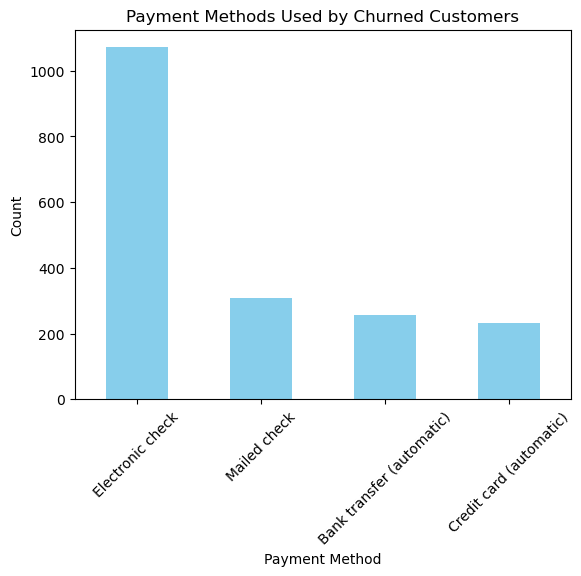

In [112]:
# Plot the results
payment_method_analysis.plot(kind='bar', color='skyblue', title='Payment Methods Used by Churned Customers')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Insights into Payment Method Preference for Churned Customers:

### Key Insights:

1.  Electronic Check Shows High Churn:

-   Electronic Check is the most common payment method among churned customers. This suggests that issues related to payment delays, failures, or administrative problems with electronic payments might be contributing to churn.

-   Consider investigating possible delays or technical issues in the electronic check processing system.

3.  Mailed Check Customers Are Also Vulnerable:

-   A significant portion of churned customers still use Mailed Check, which could be due to logistical issues like slow payment processing or inconvenience. This method may be particularly appealing to less tech-savvy customers but is prone to delays and errors that could contribute to churn.

5.  Automatic Payments May Lower Churn Risk:

-   Customers using Bank Transfers (automatic) and Credit Card (automatic) have lower churn rates, which suggests that automated payment methods may reduce friction in the payment process and improve retention.

-   To reduce churn, promoting automated payments could be beneficial, especially for customers currently using Electronic Checks or Mailed Checks.

7.  Payment Method Conversion Could Help:

-   To decrease churn, you could encourage customers who use Electronic Checks or Mailed Checks to transition to automatic payments, which might offer a smoother and more reliable payment experience.

### Recommendations:

1.  Improve Electronic Check Payment Systems:

-   Investigate and optimize the electronic check payment processing system to reduce delays and improve user experience. This could include ensuring faster processing or providing better customer support for any payment issues.

3.  Target Mailed Check Users:

-   Reach out to customers using Mailed Checks to suggest transitioning to more efficient, electronic methods like automatic bank transfers or credit card payments. This could help reduce the friction and delays associated with mailed checks.

5.  Promote Automatic Payments:

-   Promote the convenience and security of automatic payments (via Bank Transfers or Credit Cards) to reduce the likelihood of churn. Offering incentives or discounts for automatic payments could also encourage customers to switch.

In [119]:
# filter rows where churn = yes
churned_data = df[df['Churn'] == 'Yes']

# cross tabulate Gender and internetService
internet_service_by_senior_citizen = pd.crosstab(churned_data["SeniorCitizen"],churned_data["InternetService"])
print(internet_service_by_senior_citizen)

InternetService  DSL  Fiber optic   No
SeniorCitizen                         
0                381          904  108
1                 78          393    5


### which payment method does old people prefer where churn is yes ?


In [121]:
### which payment method does old people prefer where churn is yes ?
payment_method_analysis = churned_data['PaymentMethod'].value_counts()
print(payment_method_analysis)

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64


In [123]:
old_people_data = df[df['SeniorCitizen'] == 1]

old_people_payment_method = old_people_data["PaymentMethod"].value_counts()
print(old_people_payment_method)

Electronic check             594
Bank transfer (automatic)    233
Credit card (automatic)      221
Mailed check                  94
Name: PaymentMethod, dtype: int64


In [126]:
# combining data for mostly gender and senior citizen
combined_analysis = pd.DataFrame({
    'Churned Customers': payment_method_analysis,
    'Older Customers': old_people_payment_method
}).fillna(0)

In [128]:
combined_analysis

,Churned Customers,Older Customers
Bank transfer (automatic),258,233
Credit card (automatic),232,221
Electronic check,1071,594
Mailed check,308,94


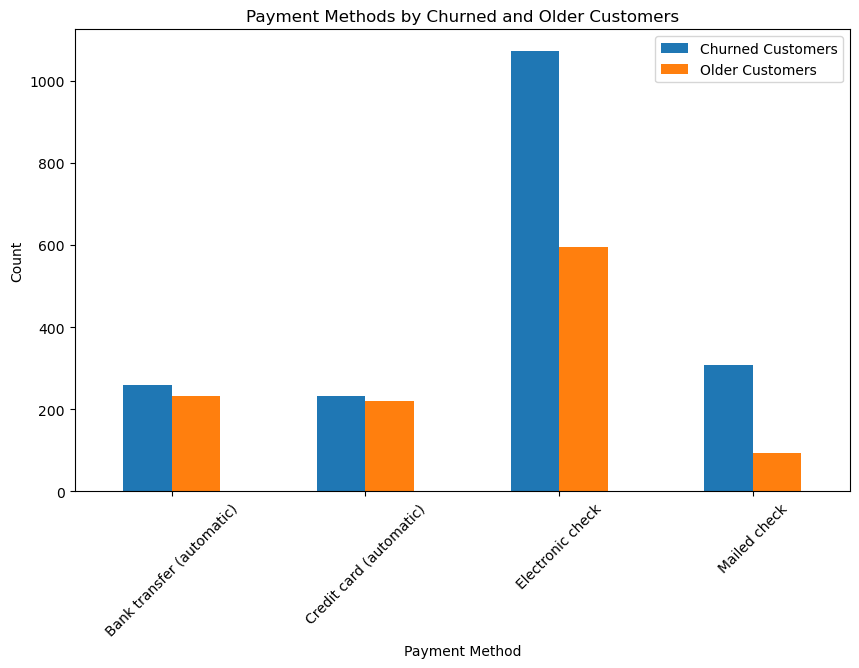

In [130]:
# Optional: Visualize using a bar plot
combined_analysis.plot(kind='bar', figsize=(10, 6), title='Payment Methods by Churned and Older Customers')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Overall Insights:

1.  High Preference for Fiber Optic Among Senior Citizens:

-   Senior citizens who have churned appear to prefer Fiber optic over DSL, which suggests that this group might be more sensitive to service disruptions, connectivity issues, or performance problems with slower internet connections.

-   Potential Action: If service quality issues with Fiber optic are driving churn, improvements in customer service or network reliability could help retain senior customers.

3.  Electronic Check Dominates Payment Method Among Seniors:

-   The most common payment method for churned senior citizens is Electronic check, which could indicate issues such as payment delays or processing errors. This method is prone to manual errors and might be more difficult for senior customers to manage effectively.

-   Potential Action: Encouraging senior customers to switch to automatic payments, either via Bank Transfer (automatic) or Credit card (automatic), could reduce churn. Offering assistance or incentives to switch could improve retention.

5.  Mailed Checks Are a Problematic Payment Method:

-   Mailed checks are the least common payment method for churned senior citizens, suggesting that the delayed payment process may be particularly frustrating for this group.

-   Potential Action: Offering alternative payment methods like automatic bank transfers could improve customer retention, especially for senior citizens.

In [138]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,months
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1.000000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,33.178227
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008357
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43.516548
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144979


In [146]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'months'],
      dtype='object')

In [ ]:
# lets inspect data so that we can group the data in particular ways and make plans out of it and do some feature engineering and some statistical analysis like hypothesis testing(t-test)

In [164]:
df[[ 'tenure', 'PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 
       'MonthlyCharges', 'Churn']]

,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn
0,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,No
1,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,56.95,No
2,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,Yes
3,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,No
4,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,No
7039,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,103.20,No
7040,11,No,DSL,Yes,No,No,No,No,No,Month-to-month,29.60,No
7041,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,74.40,Yes


so after inspecting the data, i will try to find corelation between the internet-service and online security, determing whether people who opt for particular internet service, use online security or not, and will do this with another related columns, this will help me to make different plans for different segments of services and target desired audiance accordingly.

### Determine if people using DSL or Fiber Optic internet are more likely to opt for Online Security

In [193]:
# filter dsl data and fiber optic data from Internet Service column
dsl_data = df[df['InternetService'] == 'DSL']
fiber_data = df[df['InternetService'] == 'Fiber optic']

#calculate prop for dsl 
dsl_security = dsl_data["OnlineSecurity"].value_counts(normalize = True)
print("DSL Online Security Proportions:")
print(dsl_security)

fiber_security = fiber_data['OnlineSecurity'].value_counts(normalize=True)
print("\nFiber Optic Online Security Proportions:")
print(fiber_security)
print("\n")
print(f"DSL - Opting for Online Security: {dsl_security.get('Yes', 0) * 100:.2f}%")
print(f"Fiber Optic - Opting for Online Security: {fiber_security.get('Yes', 0) * 100:.2f}%")

DSL Online Security Proportions:
No     0.512598
Yes    0.487402
Name: OnlineSecurity, dtype: float64

Fiber Optic Online Security Proportions:
No     0.729005
Yes    0.270995
Name: OnlineSecurity, dtype: float64


DSL - Opting for Online Security: 48.74%
Fiber Optic - Opting for Online Security: 27.10%


In [197]:
#statistical analysis
contingency_table = pd.crosstab(df["InternetService"], df["OnlineSecurity"])
print("Contingency Table:")
print(contingency_table)

#perform chi square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

if p < 0.05:
    print("\nConclusion: There is a significant association between Internet Service and Online Security.")
else:
    print("\nConclusion: There is no significant association between Internet Service and Online Security.")

Contingency Table:
OnlineSecurity     No  No internet service   Yes
InternetService                                 
DSL              1241                    0  1180
Fiber optic      2257                    0   839
No                  0                 1526     0

Chi-Square Test Results:
Chi-Square Statistic: 7393.058145571624
P-Value: 0.0
Degrees of Freedom: 4

Expected Frequencies:
[[1202.42197927  524.55572909  694.02229164]
 [1537.66974301  670.80732642  887.52293057]
 [ 757.90827772  330.63694448  437.45477779]]

Conclusion: There is a significant association between Internet Service and Online Security.


Insights from the Analysis of Online Security by Internet Service (DSL vs. Fiber Optic):

Key Insight:

-   DSL users are more likely to opt for Online Security than Fiber optic users. The proportion of DSL users opting for Online Security is significantly higher (48.74%) compared to Fiber optic users (27.10%).

### Insights Based on Statistical Analysis:

1.  Proportions Insight:

-   DSL customers are more inclined to opt for Online Security, with almost half of them opting for this feature.

-   On the other hand, Fiber optic customers are less likely to opt for Online Security, with only about a quarter of them choosing to subscribe to it.

3.  Statistical Conclusion:

-   If the p-value is small (< 0.05), the chi-square test result will confirm that there is a significant association between the type of internet service (DSL or Fiber optic) and the likelihood of opting for Online Security. This means that the type of internet service could be influencing customers' decisions to opt for security.

-   If the p-value is large (> 0.05), there would be no significant association between internet service type and opting for online security, suggesting that factors other than internet service type might be driving the decision to opt for security.

### Potential Actions/Recommendations:

-   If the chi-square test indicates statistical significance, this suggests that internet service type could be a factor in determining the uptake of Online Security. You could explore:

-   Improving Online Security options for Fiber optic users to encourage more of them to opt for it.

-   Offering tailored marketing or support to Fiber optic customers to educate them on the importance of Online Security.

-   If the result is not statistically significant, further analysis is needed to identify other factors that may influence the decision to opt for online security (e.g., age, device usage, or customer service interactions).

### Determine if people using DSL or Fiber Optic internet are more likely to opt for Online backup

In [195]:
#calculate prop for dsl 
dsl_backup = dsl_data["OnlineBackup"].value_counts(normalize = True)
print("DSL OlineBackup Proportions:")
print(dsl_backup)

fiber_backup = fiber_data['OnlineBackup'].value_counts(normalize=True)
print("\nFiber Optic Online Backup Proportions:")
print(fiber_backup)
print("\n")

print(f"DSL - Opting for Online Backup: {dsl_backup.get('Yes', 0) * 100:.2f}%")
print(f"Fiber Optic - Opting for Online Backup: {fiber_backup.get('Yes', 0) * 100:.2f}%")

DSL OlineBackup Proportions:
No     0.551425
Yes    0.448575
Name: OnlineBackup, dtype: float64

Fiber Optic Online Backup Proportions:
No     0.566214
Yes    0.433786
Name: OnlineBackup, dtype: float64


DSL - Opting for Online Backup: 44.86%
Fiber Optic - Opting for Online Backup: 43.38%


In [199]:
#statistical analysis
contingency_table = pd.crosstab(df["InternetService"], df["OnlineBackup"])
print("Contingency Table:")
print(contingency_table)

#perform chi square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

if p < 0.05:
    print("\nConclusion: There is a significant association between Internet Service and Online Backup.")
else:
    print("\nConclusion: There is no significant association between Internet Service and Online Backup.")

Contingency Table:
OnlineBackup       No  No internet service   Yes
InternetService                                 
DSL              1335                    0  1086
Fiber optic      1753                    0  1343
No                  0                 1526     0

Chi-Square Test Results:
Chi-Square Statistic: 7044.539401984885
P-Value: 0.0
Degrees of Freedom: 4

Expected Frequencies:
[[1061.48629845  524.55572909  834.95797245]
 [1357.43972739  670.80732642 1067.75294619]
 [ 669.07397416  330.63694448  526.28908136]]

Conclusion: There is a significant association between Internet Service and Online Backup.


### Insights from the Analysis of Online Backup Adoption by Internet Service Type (DSL vs. Fiber Optic):

Key Insight:

-   DSL and Fiber Optic users have almost identical proportions of opting for Online Backup. The difference in adoption rates is very small, with DSL users slightly more likely to opt for it.

### Conclusion from Chi-Square Test:

-   Since the p-value is 0.0, which is much less than 0.05, we can conclude that there is a significant association between Internet Service (DSL vs. Fiber optic) and the decision to opt for Online Backup. This suggests that the type of internet service does influence whether a customer subscribes to Online Backup.

### Further Insights:

1.  Proportions Comparison:

-   DSL users are slightly more likely to opt for Online Backup compared to Fiber optic users, but the difference is minimal (44.86% vs. 43.38%).

3.  Chi-Square Test Result:

-   The significant p-value (< 0.05) indicates that Internet Service Type (DSL, Fiber optic, No internet service) is associated with whether a customer opts for Online Backup.

-   The expected and observed frequencies suggest that both DSL and Fiber optic users follow a similar pattern of opting for or against Online Backup, with no stark differences in their choices.

### Potential Actions/Recommendations:

-   Focus on the similarity in adoption: Since both DSL and Fiber optic users have similar proportions of opting for Online Backup, marketing or support efforts could be equally focused on both groups.

-   Improving options for "No" users: A considerable proportion of customers in both categories have not opted for Online Backup. Targeted campaigns could be created to highlight the benefits of Online Backup and incentivize users, especially those in the "No" category.

## corr between internet service and device protection


In [201]:

contingency_table = pd.crosstab(df["InternetService"], df["DeviceProtection"])
print("Contingency Table:")
print(contingency_table)

#perform chi square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

if p < 0.05:
    print("\nConclusion: There is a significant association between Internet Service and Device Protection.")
else:
    print("\nConclusion: There is no significant association between Internet Service and Device Protection.")

Contingency Table:
DeviceProtection    No  No internet service   Yes
InternetService                                  
DSL               1356                    0  1065
Fiber optic       1739                    0  1357
No                   0                 1526     0

Chi-Square Test Results:
Chi-Square Statistic: 7043.017879444413
P-Value: 0.0
Degrees of Freedom: 4

Expected Frequencies:
[[1063.89251739  524.55572909  832.55175351]
 [1360.51682522  670.80732642 1064.67584836]
 [ 670.59065739  330.63694448  524.77239813]]

Conclusion: There is a significant association between Internet Service and Device Protection.


### Key Insights from the Analysis of Device Protection and Internet Service Type (DSL vs. Fiber Optic):

### Conclusion from Chi-Square Test:

-   Since the p-value is 0.0, which is much less than 0.05, we can conclude that there is a significant association between Internet Service Type (DSL, Fiber optic) and the decision to opt for Device Protection. This suggests that the type of internet service does have an influence on whether customers subscribe to Device Protection.

### Further Insights:

1.  Proportions Comparison:

-   DSL and Fiber optic users have nearly identical proportions of opting for Device Protection (44.06% vs. 43.99%).

-   The minor difference suggests that the internet service type does not significantly alter the likelihood of opting for Device Protection.

3.  Chi-Square Test Result:

-   The significant p-value (< 0.05) indicates a statistically significant association between Internet Service Type and Device Protection.

-   However, the observed and expected frequencies suggest that both DSL and Fiber optic users behave similarly when it comes to opting for Device Protection, with no major differences in their choices.

### Potential Actions/Recommendations:

-   Targeted Campaigns: Since the proportion of customers opting for Device Protection is similar across both DSL and Fiber optic users, marketing efforts can target both groups equally.

-   Focus on Conversion: Given that a significant proportion of both DSL and Fiber optic users do not opt for Device Protection, creating campaigns that emphasize the benefits of Device Protection could help increase adoption across both groups.

## corr between internet service and tech support


In [209]:
# corr between internet service and tech support

contingency_table = pd.crosstab(df["InternetService"], df["TechSupport"])
print("Contingency Table:")
print(contingency_table)

#perform chi square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

if p < 0.05:
    print("\nConclusion: There is a significant association between Internet Service and Device Protection.")
else:
    print("\nConclusion: There is no significant association between Internet Service and Device Protection.")

Contingency Table:
TechSupport        No  No internet service   Yes
InternetService                                 
DSL              1243                    0  1178
Fiber optic      2230                    0   866
No                  0                 1526     0

Chi-Square Test Results:
Chi-Square Statistic: 7361.215209681672
P-Value: 0.0
Degrees of Freedom: 4

Expected Frequencies:
[[1193.8283402   524.55572909  702.61593071]
 [1526.68010791  670.80732642  898.51256567]
 [ 752.4915519   330.63694448  442.87150362]]

Conclusion: There is a significant association between Internet Service and Device Protection.


## Key Insights from the Analysis of Tech Support and Internet Service Type (DSL vs. Fiber Optic):

Key Insight:

-   DSL users are more likely to have Tech Support compared to Fiber optic users. Almost half of DSL users have opted for Tech Support, whereas only about a quarter of Fiber optic users have Tech Support.

### Conclusion from Chi-Square Test:

-   Since the p-value is 0.0, which is much less than 0.05, we can conclude that there is a significant association between Internet Service Type (DSL, Fiber optic) and the decision to opt for Tech Support. This indicates that the type of internet service significantly influences whether or not customers choose Tech Support.

### Further Insights:

1.  Proportions Comparison:

-   DSL users are significantly more likely to opt for Tech Support than Fiber optic users. Around 48.77% of DSL users have Tech Support, compared to only 27.89% of Fiber optic users.

3.  Chi-Square Test Result:

-   The significant p-value (< 0.05) indicates a statistically significant association between Internet Service Type and Tech Support.

-   This suggests that DSL and Fiber optic users behave differently when it comes to subscribing to Tech Support, with DSL users showing higher adoption of this service.

### Key Takeaways and Recommendations:

-   DSL users show higher interest in Tech Support, which may be due to a perception of more potential technical issues with DSL connections or more aggressive marketing or support initiatives for this group.

-   Fiber optic users, on the other hand, may feel that their Fiber optic service is more reliable and hence feel less of a need for Tech Support.

### Potential Actions/Recommendations:

-   Targeted Campaigns: Since DSL users are more likely to opt for Tech Support, providers could focus on Fiber optic users with campaigns promoting Tech Support to increase adoption.

-   Service Reliability Messaging: Fiber optic providers might want to reassure customers about the reliability of their service and highlight the benefits of Tech Support, even for customers who feel confident in the quality of their service.

In [ ]:
#  finding how many DSL and Fiber Optic users have a tenure greater than 12 months

In [226]:
dsl_tenure = df[(df['InternetService'] == 'DSL') & (df['tenure'] > 12)]
fiber_tenure = df[(df['InternetService'] == 'Fiber optic') & (df['tenure'] > 12)]

dsl_count = len(dsl_tenure)
fiber_count = len(fiber_tenure)

print(f"Number of DSL users with tenure > 12 months: {dsl_count}")
print(f"Number of Fiber Optic users with tenure > 12 months: {fiber_count}")

Number of DSL users with tenure > 12 months: 1671
Number of Fiber Optic users with tenure > 12 months: 2173


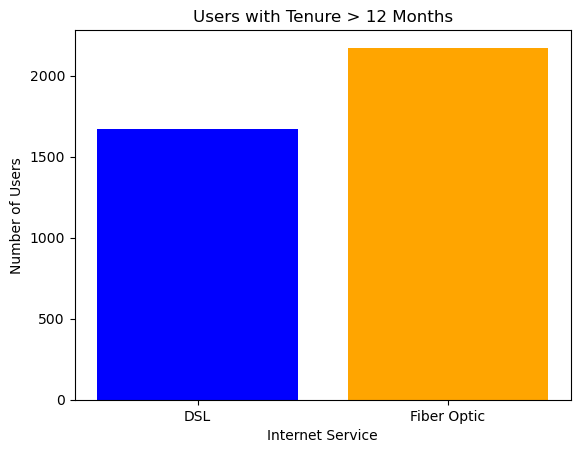

In [240]:
counts = {'DSL': dsl_count, 'Fiber Optic': fiber_count}

# Plot
plt.bar(counts.keys(), counts.values(), color=['blue', 'orange'])
plt.title('Users with Tenure > 12 Months')
plt.xlabel('Internet Service')
plt.ylabel('Number of Users')
plt.show()

## Key Insights from Tenure Analysis for DSL and Fiber Optic Users:

### Key Observations:

1.  Fiber Optic Users Have Longer Tenure:

-   The number of Fiber Optic users with a tenure greater than 12 months (2173) is higher than the number of DSL users with the same tenure (1671).

-   This suggests that Fiber Optic users may be more likely to stay with the service for a longer period compared to DSL users.

3.  Retention Insight:

-   The higher number of Fiber Optic users with tenure > 12 months could indicate that Fiber Optic service may offer higher satisfaction or better quality, leading to longer retention times.

-   DSL users, in comparison, might experience lower satisfaction or face more technical issues that cause them to leave sooner than Fiber Optic users.

5.  Potential Action Points for Service Providers:

-   Retention Strategies: If Fiber Optic users are indeed more loyal, providers may want to focus on retaining DSL users by improving the quality of service, customer support, or offering incentives for longer tenure.

-   Customer Segmentation: It could be valuable to segment customers based on tenure and tailor loyalty programs for users with longer tenures, particularly those on Fiber Optic plans.

In [232]:
dsl_phone = df[(df['InternetService'] == 'DSL') & (df['PhoneService'] == "Yes")]
fiber_phone = df[(df['InternetService'] == 'Fiber optic') & (df['PhoneService'] == "Yes")]

dsl_phone_count = len(dsl_phone)
fiber_phone_count = len(fiber_phone)

print(f"Number of DSL users with phone service > 12 months: {dsl_phone_count}")
print(f"Number of Fiber Optic users with phone service > 12 months: {fiber_phone_count}")

Number of DSL users with phone service > 12 months: 1739
Number of Fiber Optic users with phone service > 12 months: 3096


In [ ]:
internetService_phoneService_count = {'DSL': dsl_phone, 'Fiber Optic': fiber_phone}

#plot
plt.bar(internetService_phoneService_count.key(), internetService_phoneService_count.values(), color = ['blue', 'orange'])
plt.title('Users with tenure > 12 ')

In [238]:
# and one final query
dsl_tenure_phone_churned = df[(df['InternetService'] == 'DSL') & (df['tenure'] > 12) & (df['PhoneService'] == "Yes") & (df['Churn'] == "Yes") ]
fiber_tenure_phone_churned = df[(df['InternetService'] == 'Fiber optic') & (df['tenure'] > 12) & (df['PhoneService'] == "Yes") & (df['Churn'] == "Yes") ]


dsl_tenure_phone_churned_count = len(dsl_tenure_phone_churned)
fiber_tenure_phone_churned_count = len(fiber_tenure_phone_churned)

print(f"Number of DSL users with phone service and tenure > 12 months: {dsl_tenure_phone_churned_count}")
print(f"Number of Fiber Optic users with phone service and tenure  > 12 months: {fiber_tenure_phone_churned_count}")

Number of DSL users with phone service and tenure > 12 months: 92
Number of Fiber Optic users with phone service and tenure  > 12 months: 652


Key Insights from DSL and Fiber Optic Users with Phone Service and Tenure > 12 Months Who Churned:

### Key Observations:

1.  High Churn Among Fiber Optic Users:

-   The number of Fiber Optic users who have churned after having phone service and being with the company for more than 12 months (652) is significantly higher than the 92 DSL users in the same category.

-   This indicates that Fiber Optic users with phone service may have a higher likelihood of leaving the service, despite being long-term customers (tenure > 12 months).

3.  Churn Rate Insight:

-   The relatively low churn rate for DSL users in this segment suggests that DSL customers with phone service and long tenure are potentially more loyal or less likely to churn compared to Fiber Optic users under similar circumstances.

5.  Customer Satisfaction and Service Improvement:

-   Fiber Optic users could be experiencing issues related to phone service or other factors contributing to their churn. Investigating the reasons for churn could provide more actionable insights (e.g., dissatisfaction with phone service quality, pricing, or customer support).

-   DSL users may not face the same issues and could potentially represent a more stable customer segment, though further analysis is needed to understand the reasons behind their lower churn.

### Potential Action Points:

-   Investigate Churn Reasons: Understanding why Fiber Optic users are churning at such a high rate despite having phone service could help identify areas for improvement.

-   Targeted Retention Strategies: Service providers may want to develop retention campaigns specifically targeting long-tenured Fiber Optic users who also use phone service to prevent churn.

-   Improve Phone Service: As phone service is a common factor among both groups, addressing any issues related to phone service quality might reduce churn, especially for Fiber Optic users.

# INSIGHTS AND RECOMMENADATIONS CONCLUDED:

**Key Findings:**

-   **No Direct Gender Impact on Churn:** While initially it seemed women churned more, statistically, gender alone does *not* significantly influence churn. Focus should be on other factors.
-   **Service Features Significantly Impact Churn:** Online Security, Device Protection, and Tech Support all demonstrably reduce churn. Customers *without* these features churn at higher rates.
-   **Contract Length Matters:** Month-to-month contracts have the highest churn, while longer-term contracts (1-2 years) have significantly lower churn.
-   **Senior Citizens are a Vulnerable Group:** Senior citizens exhibit higher churn rates than non-senior citizens.
-   **Internet Service Type Interacts with Other Factors:**
    -   **Online Security:** DSL users are more likely to opt for Online Security than Fiber Optic users.
    -   **Tech Support:** Similar to Online Security, DSL users are more likely to have Tech Support.
    -   **Tenure:** Fiber Optic users tend to have longer tenures than DSL users.
    -   **Churn (with Phone Service & Long Tenure):** Despite longer tenures, Fiber Optic users with phone service churn at a *much* higher rate than comparable DSL users. This is a critical finding.
-   **Payment Method Impacts Churn:** Electronic Checks and Mailed Checks are associated with higher churn, while automatic payments (Bank Transfer and Credit Card) correlate with lower churn.
-   **Fiber Optic & Churn:** While Fiber Optic is popular, it's also associated with higher churn rates, especially when combined with phone service and longer tenure. This suggests potential service quality or support issues for this specific segment.

**Key Recommendations for Minimizing Churn:**

1.  **Promote Service Add-ons (Online Security, Device Protection, Tech Support):**

    -   Emphasize the value proposition of these services in marketing campaigns.
    -   Offer bundled packages or discounts to incentivize adoption, particularly targeting customers who don't currently have these features.
    -   Specifically target Fiber Optic users for Online Security and Tech Support, as their adoption rates are lower than DSL users.
2.  **Incentivize Longer-Term Contracts:**

    -   Offer discounts or exclusive benefits for customers who commit to 1-2 year contracts.
    -   Clearly communicate the cost savings and stability advantages of longer-term agreements.
3.  **Targeted Retention Strategies for Senior Citizens:**

    -   Develop customized plans or discounts tailored to the needs and budgets of senior citizens.
    -   Provide dedicated customer support channels and resources to address their specific concerns.
    -   Ensure services and interfaces are user-friendly and accessible for this demographic.
4.  **Address Fiber Optic Churn, Especially with Phone Service:**

    -   *Investigate the root causes of high churn among long-tenured Fiber Optic users with phone service.* This is the most critical action. Conduct surveys, analyze support tickets, and examine network performance to pinpoint issues.
    -   Improve service reliability, phone service quality, and customer support for Fiber Optic users.
    -   Consider targeted retention campaigns for this specific segment.
5.  **Encourage Automatic Payments:**

    -   Promote the convenience and reliability of automatic payments (Bank Transfer/Credit Card).
    -   Offer incentives (e.g., discounts, bonus features) to encourage customers using Electronic or Mailed Checks to switch.
6.  **Investigate and Improve Electronic Check Processing:**

    -   Identify and resolve any delays, technical issues, or administrative problems associated with electronic check processing.
7.  **Monitor "No Internet Service" Customers:**

    -   While churn is low in this segment, proactively engage with these customers to understand their needs and explore potential upselling opportunities.
8.  **Continue Monitoring and Analysis:** Regularly review churn data and the effectiveness of implemented strategies. Conduct A/B testing on different retention tactics to optimize their impact.

**Prioritization:**

The most urgent action is to investigate the high churn rate among long-tenured Fiber Optic users with phone service. This segment represents a significant loss of valuable customers. Addressing this issue should be the top priority. Following that, promoting service add-ons and incentivizing longer-term contracts will have the broadest impact on overall churn reduction.

By implementing these recommendations, you can significantly reduce churn, improve customer retention, and increase overall business profitability.